In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path

In [16]:
summary_file_path = Path("results/batch_summary.csv")
if summary_file_path.exists():
    summary_df = pd.read_csv(summary_file_path)
else:
    print(f"Error: Summary file not found at '{summary_file_path}'.")

2025-05-12 06:33:29,031 - INFO - Using provided DataFrame for plotting.


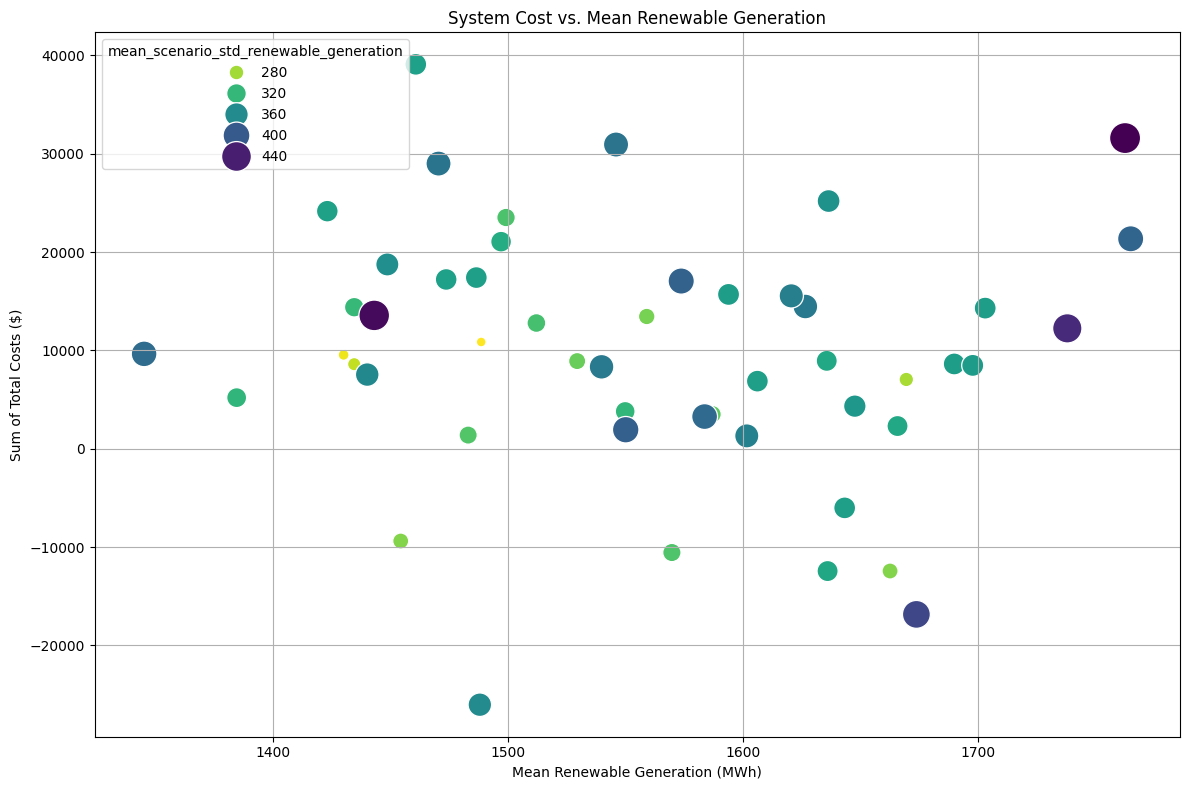

In [18]:
from src.batch_analysis.plotting_utils import plot_generation_cost_scatter

plot_generation_cost_scatter(summary_df)

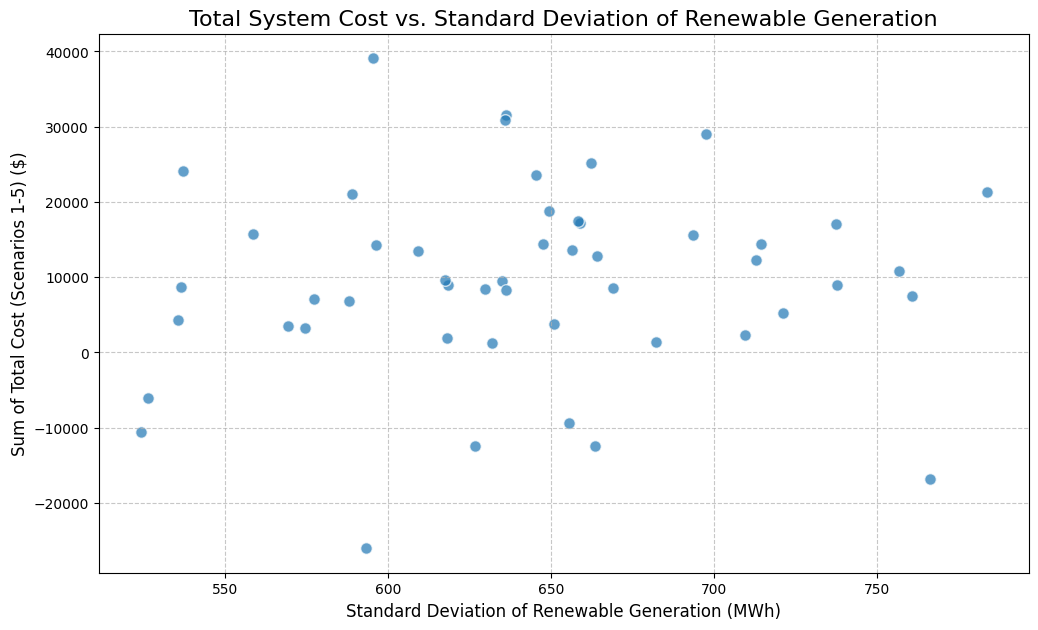

In [22]:
# Check if the required columns exist
if 'overall_std_renewable_generation' in summary_df.columns and 'sum_total_cost' in summary_df.columns:
    # Create the scatter plot
    plt.figure(figsize=(12, 7))
    plt.scatter(summary_df['overall_std_renewable_generation'], summary_df['sum_total_cost'], alpha=0.7, edgecolors='w', s=70)
    
    plt.title('Total System Cost vs. Standard Deviation of Renewable Generation', fontsize=16)
    plt.xlabel('Standard Deviation of Renewable Generation (MWh)', fontsize=12) # Adjust unit if needed
    plt.ylabel('Sum of Total Cost (Scenarios 1-5) ($)', fontsize=12) # Clarified Y-axis label
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print(f"Error: Columns 'overall_std_renewable_generation' or 'sum_total_cost' not found in {summary_file_path}.")
    print("Please ensure summarize_batch_results.py has run and generated these columns.")

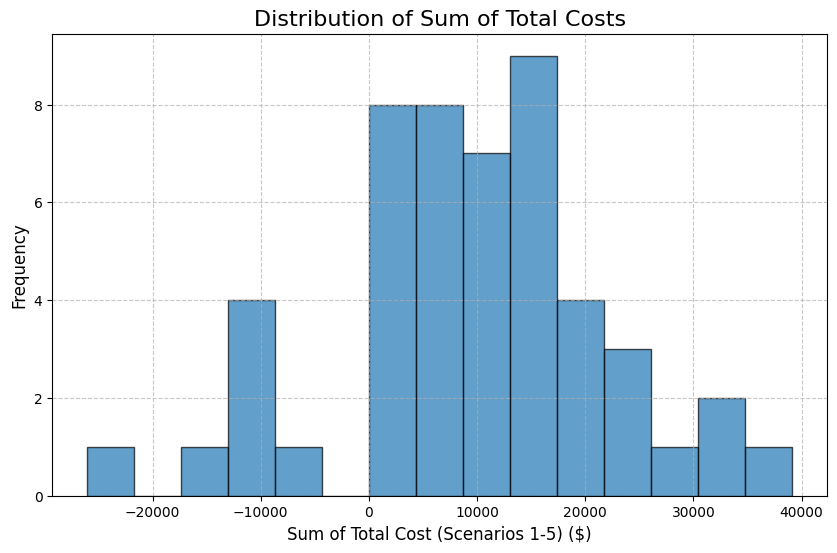

In [23]:
if 'sum_total_cost' in summary_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(summary_df['sum_total_cost'].dropna(), bins=15, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Sum of Total Costs', fontsize=16)
    plt.xlabel('Sum of Total Cost (Scenarios 1-5) ($)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'sum_total_cost' not found in the DataFrame.")

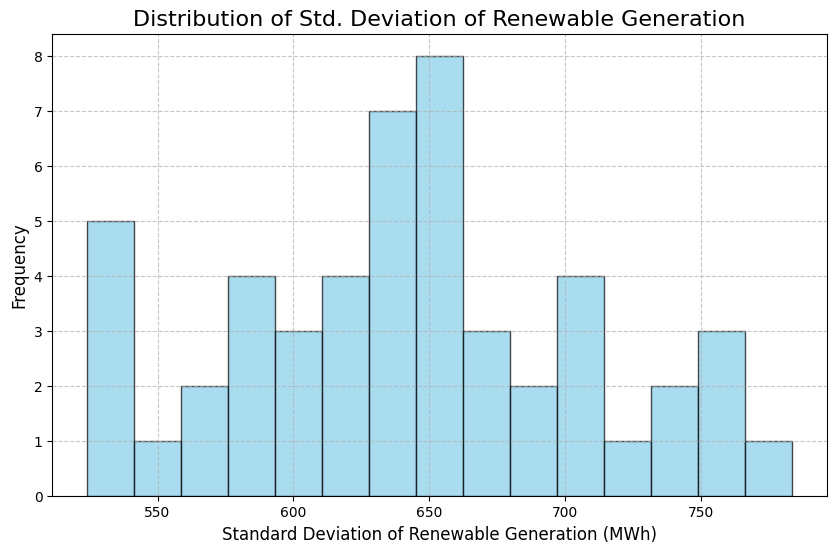

In [24]:
if 'overall_std_renewable_generation' in summary_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(summary_df['overall_std_renewable_generation'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title('Distribution of Std. Deviation of Renewable Generation', fontsize=16)
    plt.xlabel('Standard Deviation of Renewable Generation (MWh)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'overall_std_renewable_generation' not found in the DataFrame.")

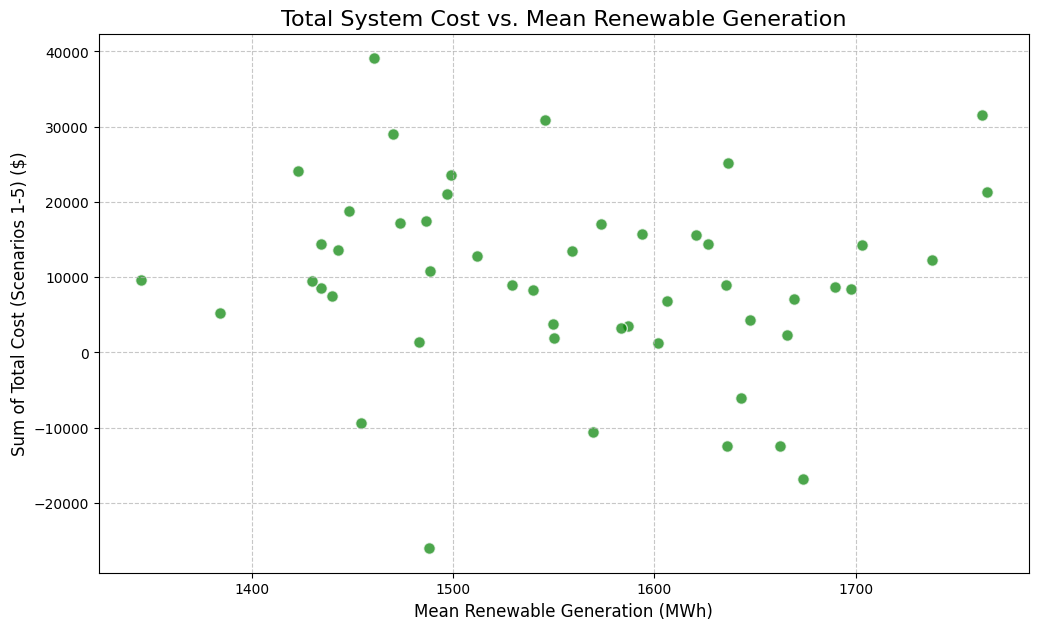

In [25]:
if 'mean_renewable_generation' in summary_df.columns and 'sum_total_cost' in summary_df.columns:
    plt.figure(figsize=(12, 7))
    plt.scatter(summary_df['mean_renewable_generation'], summary_df['sum_total_cost'], alpha=0.7, edgecolors='w', s=70, color='green')
    
    plt.title('Total System Cost vs. Mean Renewable Generation', fontsize=16)
    plt.xlabel('Mean Renewable Generation (MWh)', fontsize=12)
    plt.ylabel('Sum of Total Cost (Scenarios 1-5) ($)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Columns 'mean_renewable_generation' or 'sum_total_cost' not found.")

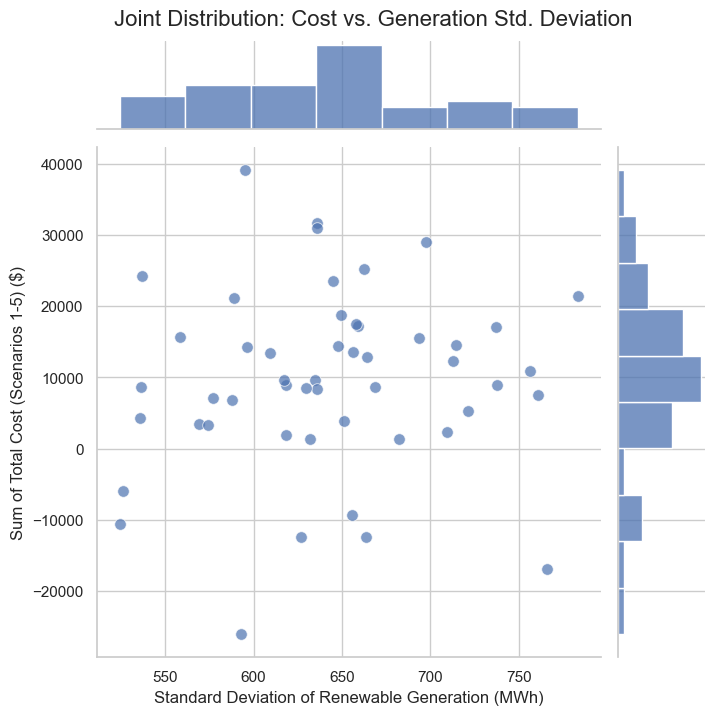

In [26]:
if 'overall_std_renewable_generation' in summary_df.columns and 'sum_total_cost' in summary_df.columns:
    sns.set_theme(style="whitegrid")
    g = sns.jointplot(x='overall_std_renewable_generation', 
                    y='sum_total_cost', 
                    data=summary_df.dropna(subset=['overall_std_renewable_generation', 'sum_total_cost']), 
                    kind='scatter', # or 'kde' or 'hist'
                    height=7, 
                    alpha=0.7, 
                    edgecolor='w',
                    s=70)
    g.set_axis_labels('Standard Deviation of Renewable Generation (MWh)', 'Sum of Total Cost (Scenarios 1-5) ($)', fontsize=12)
    g.fig.suptitle('Joint Distribution: Cost vs. Generation Std. Deviation', fontsize=16, y=1.02) # y adjusts title position
    plt.show()
else:
    print("Columns 'overall_std_renewable_generation' or 'sum_total_cost' not found for joint plot.")